## DBSCAN: Density Based Spatial Clustering of Application with Noise 

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np

In [5]:
import pandas as pd
dataset = pd.read_csv('Mall_customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
from itertools import product
eps_values = np.arange(8, 12.75, 0.25) #radius
min_samples = np.arange(2, 10)
DBSCAN_param = list(product(eps_values, min_samples))
DBSCAN_param

[(8.0, 2),
 (8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 2),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.25, 6),
 (8.25, 7),
 (8.25, 8),
 (8.25, 9),
 (8.5, 2),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.5, 6),
 (8.5, 7),
 (8.5, 8),
 (8.5, 9),
 (8.75, 2),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (8.75, 6),
 (8.75, 7),
 (8.75, 8),
 (8.75, 9),
 (9.0, 2),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.0, 6),
 (9.0, 7),
 (9.0, 8),
 (9.0, 9),
 (9.25, 2),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.25, 6),
 (9.25, 7),
 (9.25, 8),
 (9.25, 9),
 (9.5, 2),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.5, 6),
 (9.5, 7),
 (9.5, 8),
 (9.5, 9),
 (9.75, 2),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (9.75, 6),
 (9.75, 7),
 (9.75, 8),
 (9.75, 9),
 (10.0, 2),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.0, 6),
 (10.0, 7),
 (10.0, 8),
 (10.0, 9),
 (10.25, 2),
 (10.25, 3),
 (10.25, 4),
 (10.25, 5),
 (10.25, 6),
 (10.25, 7),
 (10.25, 8),
 (10.25, 9),
 (10.5, 2),
 (10.5, 3),
 (10.5, 4),
 (10.5, 5),
 (10.5, 6),
 (10

In [8]:
from sklearn.metrics import silhouette_score

number_of_clusters = []
s_score = []

for p in DBSCAN_param:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(data)
    number_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    s_score.append(silhouette_score(data, DBS_clustering.labels_))

In [18]:
tmp = pd.DataFrame.from_records(DBSCAN_param, columns=['Eps', 'Min_sample'])
tmp['No_of_clusters'] = number_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_sample', columns='Eps')

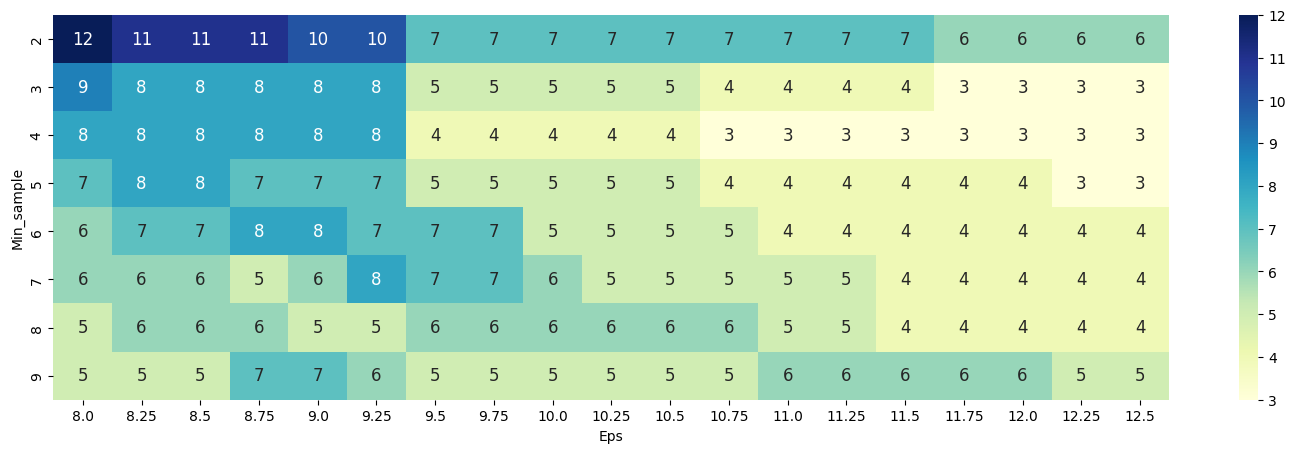

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,5))
sns.heatmap(pivot_1, annot=True, cmap='YlGnBu', ax=ax, annot_kws={'size' : 12})
plt.show()

In [16]:
tmp = pd.DataFrame.from_records(DBSCAN_param, columns=['Eps', 'Min_sample'])
tmp['Sil_score'] = s_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_sample', columns='Eps')

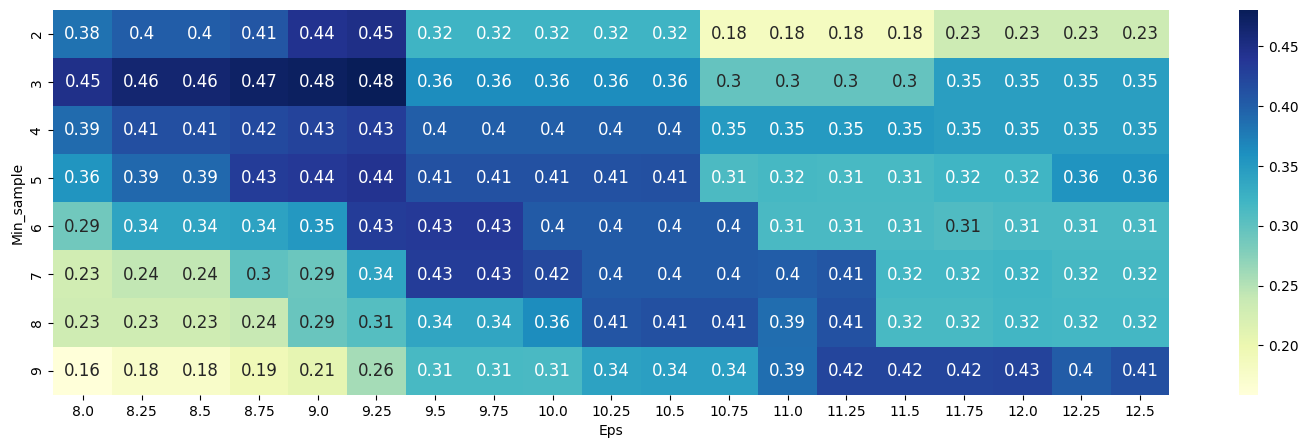

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,5))
sns.heatmap(pivot_1, annot=True, cmap='YlGnBu', ax=ax, annot_kws={'size' : 12})
plt.show()

In [19]:
DBS_clustering = DBSCAN(eps = 9.25, min_samples = 3).fit(data)
DBS_clustered = data.copy()
DBS_clustered.loc[ : , 'Cluster'] = DBS_clustering.labels_
DBS_clustered

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,0
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [20]:
DBSCAN_clust_sizes = DBS_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ['DBSCAN_size']
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,10
0,7
1,18
2,12
3,3
4,89
5,33
6,28


In [21]:
dataset['Clusters'] = DBS_clustering.labels_
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [22]:
outliers = DBS_clustered[DBS_clustered['Cluster'] == -1]
outliers

,Annual Income (k$),Spending Score (1-100),Cluster
187,101,68,-1
191,103,69,-1
192,113,8,-1
193,113,91,-1
194,120,16,-1
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1
199,137,83,-1


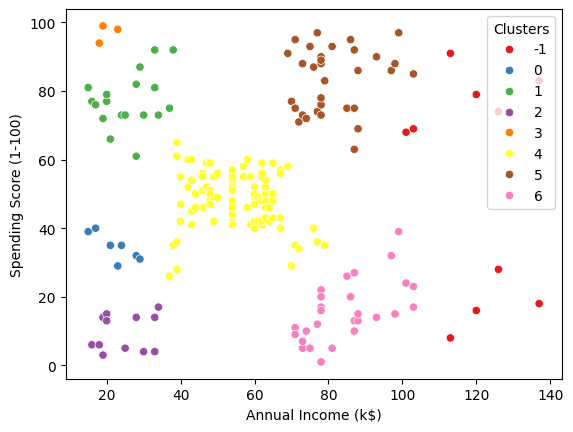

In [23]:
sns.scatterplot(x = 'Annual Income (k$)', y ='Spending Score (1-100)', 
                data = dataset, hue = 'Clusters', palette='Set1', legend='full');